# 1. Install Dependencies and Setup

In [38]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

INFO: pip is looking at multiple versions of tensorflow-gpu to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^


In [39]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
aiofiles                     23.2.1
altair                       5.5.0
annotated-types              0.7.0
anyio                        4.6.2.post1
asgiref                      3.8.1
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        24.2.0
blinker                      1.7.0
cachetools                   5.5.0
certifi                      2024.2.2
charset-normalizer           3.3.2
chex                         0.1.87
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
distinctipy                  1.3.4
distlib                      0.3.9
Django                       5.0.4
djangorestframework          3.15.1
dm-tree                      0.1.

In [40]:
import tensorflow as tf
import os

In [41]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [42]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [43]:
#import cv2
import imghdr

In [44]:
data_dir = 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects' 

In [45]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [46]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Ant bites\antsbite16.jpg
Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Ant bites\antsbite17.jpg
Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Ant bites\sample_antsbite17.jpg
Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Deformed body\deformedBody100.jpg
Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Deformed body\deformedBody101.jpg
Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Deformed body\deformedBody102.jpg
Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Deformed body\deformedBody103.jpg
Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Deformed body\deformedBody104.jpg
Issue with image C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects\Deformed body\defor

# 3. Load Data

In [47]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
data = tf.keras.utils.image_dataset_from_directory('C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects')

Found 128 files belonging to 6 classes.


In [49]:
data_iterator = data.as_numpy_iterator()

In [50]:
batch = data_iterator.next()

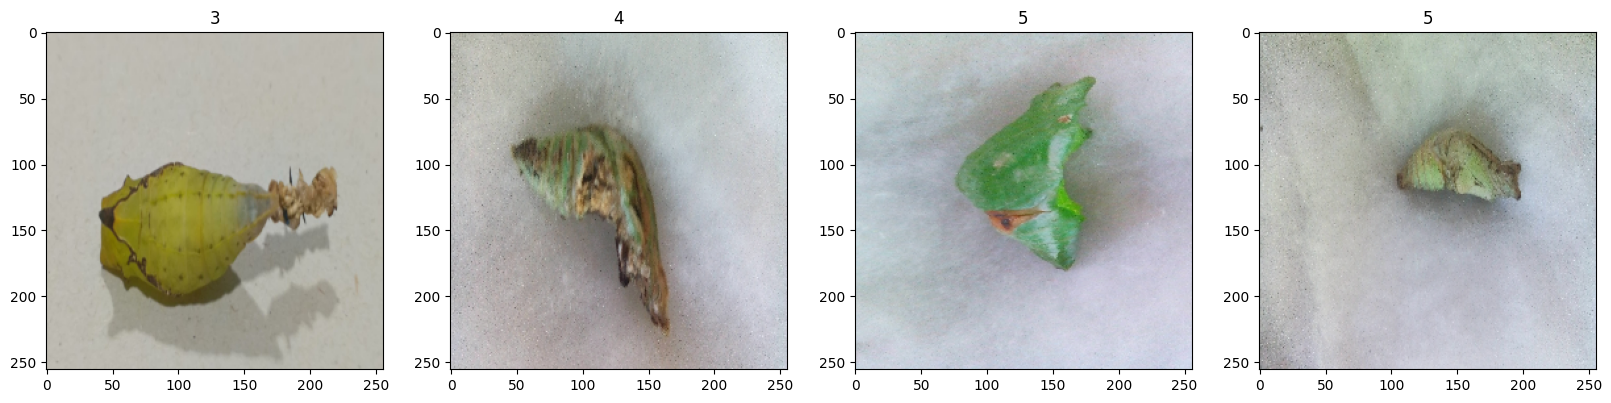

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [52]:
data = data.map(lambda x,y: (x/255, y))

In [53]:
data.as_numpy_iterator().next()

(array([[[[0.53606004, 0.53213847, 0.45125613],
          [0.5531097 , 0.54918814, 0.47026655],
          [0.56583947, 0.5619179 , 0.4866728 ],
          ...,
          [0.61548716, 0.5958793 , 0.4703891 ],
          [0.57247245, 0.5528646 , 0.43203124],
          [0.60381436, 0.59204966, 0.470481  ]],
 
         [[0.5611673 , 0.55724573, 0.47881433],
          [0.51760113, 0.51367956, 0.43475798],
          [0.57850796, 0.5745864 , 0.50399816],
          ...,
          [0.617019  , 0.60353863, 0.4828278 ],
          [0.5817555 , 0.5621477 , 0.44450063],
          [0.57290137, 0.55942094, 0.43871018]],
 
         [[0.57002145, 0.5660999 , 0.49551165],
          [0.5454657 , 0.54154414, 0.46311274],
          [0.5382506 , 0.53432906, 0.45589766],
          ...,
          [0.5852022 , 0.5655944 , 0.4479473 ],
          [0.59673715, 0.5771293 , 0.45948222],
          [0.5544577 , 0.5348499 , 0.41720283]],
 
         ...,
 
         [[0.2407169 , 0.2171875 , 0.1544424 ],
          [0.23621

# 5. Split Data

In [54]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [55]:
train_size

2

In [56]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [57]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [69]:
train.class_names


AttributeError: '_TakeDataset' object has no attribute 'class_names'

In [68]:
pupae_defects = train.class_names
pupae_defects

AttributeError: '_TakeDataset' object has no attribute 'class_names'

In [58]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [59]:
model = Sequential()

In [60]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [61]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

# 7. Train

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

# 8. Plot Performance

KeyError: 'val_loss'

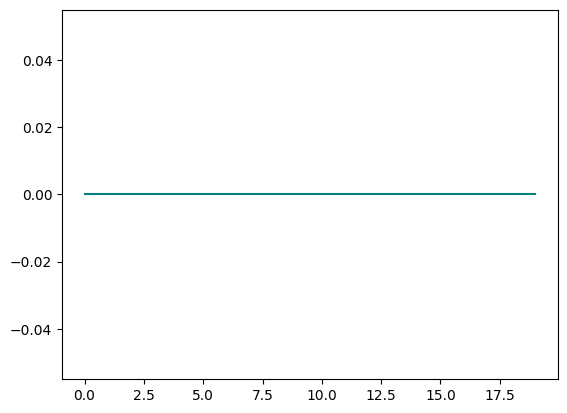

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: 'val_accuracy'

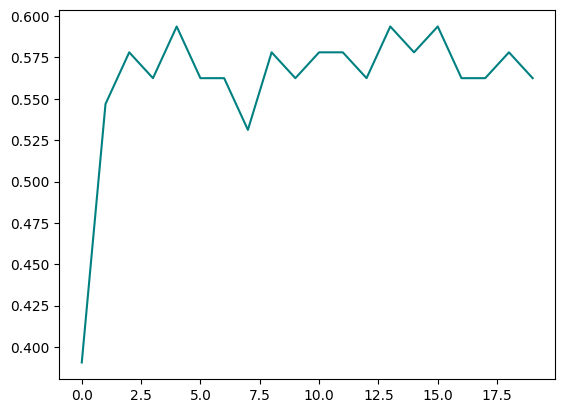

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/over_bend (2).jpg')
plt.imshow(img)
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[0.01972741]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Defects')
else:
    print(f'Predicted class is Healthy')

Predicted class is Happy


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)